# TUGAS PRA UAS

## 1. Data Set

https://archive.ics.uci.edu/dataset/45/heart+disease

In [29]:
pip install ucimlrepo

In [30]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

## 2.	Data Understanding
### a.	Fitur atau variable data


Berdasarkan dokumentasi dataset Cleveland (14 fitur utama + target `num`):

* **age**: usia pasien (tahun)
* **sex**: jenis kelamin (1=pria, 0=wanita)
* **cp**: tipe nyeri dada (1–4: tipikal, atipikal, non-anginal, asimtomatik)
* **trestbps**: tekanan darah istirahat (mm Hg)
* **chol**: kolesterol serum (mg/dl)
* **fbs**: gula darah puasa > 120 mg/dl (1 = ya, 0 = tidak)
* **restecg**: hasil ECG istirahat (0=normal, 1=ST-T abnormal, 2=LV hypertrophy)
* **thalach**: denyut jantung maksimum dicapai
* **exang**: angina akibat latihan (1 = ya, 0 = tidak)
* **oldpeak**: depresi ST karena latihan relatif istirahat
* **slope**: kemiringan segmen ST saat puncak latihan (1 = naik, 2 = datar, 3 = turun)
* **ca**: jumlah pembuluh utama (0–3) terlihat melalui fluoroskopi
* **thal**: hasil tes thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)
* **num** *(target)*: 0 = tidak ada penyakit, 1–4 = adanya penyakit (biasanya dibinerisasi menjadi 0/1)

### b. Ekplorasi data

* **Missing values**: Beberapa dataset (Hungary, Switzerland, Cleveland) memiliki missing di fitur seperti `ca`, `thal` perlu dicek & imputasi jika diperlukan .
* **Outlier**: Beberapa fitur numerik seperti `chol`, `trestbps`, `oldpeak` punya outlier ekstrem. Identifikasi lewat boxplot IQR/visualisasi.
* **Distribusi**: Fitur kategorikal (`cp`, `sex`, `exang`, `slope`) perlu dicek distribusinya, fitur numerik bisa dilihat dari histogram dan density plot.

Dataset Cleveland dari UCI dimuat dari file yang tidak memiliki header, sehingga setiap kolom diberi nama secara manual agar dapat dikenali dan dianalisis dengan baik. Setelah data dimuat, dilakukan pengecekan terhadap nilai hilang. Dataset ini menggunakan tanda “?” sebagai indikator nilai yang hilang, sehingga karakter tersebut diganti dengan nilai `NaN` agar dapat dikenali dan diproses oleh sistem.

Setelah nilai hilang ditandai dengan `NaN`, dilakukan perhitungan jumlah missing value untuk setiap kolom. Hasilnya menunjukkan bahwa kolom `ca` dan `thal` merupakan fitur yang memiliki nilai kosong. Kedua kolom tersebut pada awalnya bertipe data objek (karena mengandung karakter “?”), sehingga perlu dikonversi menjadi numerik. Proses konversi dilakukan dengan mengubah seluruh isi kolom ke tipe numerik, dan bila terdapat nilai yang tidak bisa diubah, akan secara otomatis dijadikan `NaN`.

Selanjutnya, dilakukan eksplorasi visual untuk mendeteksi nilai-nilai ekstrem atau outlier pada fitur-fitur numerik. Lima fitur dipilih untuk divisualisasikan, yaitu `age`, `trestbps`, `chol`, `thalach`, dan `oldpeak`. Masing-masing fitur ditampilkan dalam bentuk boxplot. Melalui boxplot ini, dapat dilihat sebaran data, nilai minimum dan maksimum, serta apakah terdapat nilai yang berada jauh di luar rentang mayoritas data (yang ditandai dengan titik-titik di luar kotak atau whisker). Outlier ini penting untuk diidentifikasi karena dapat mempengaruhi interpretasi data atau proses pelatihan model, terutama jika algoritma yang digunakan sensitif terhadap nilai ekstrem.



Jumlah missing value per kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


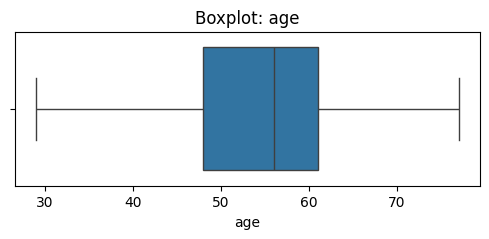

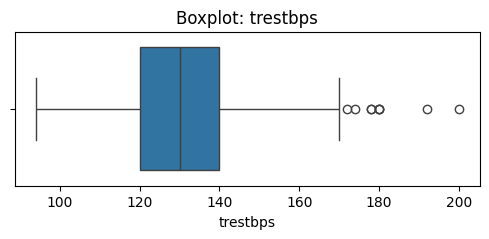

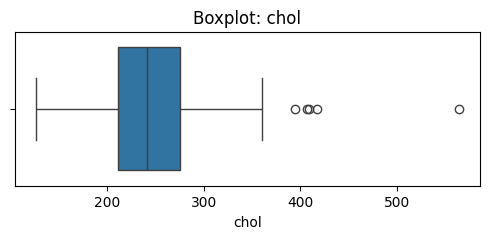

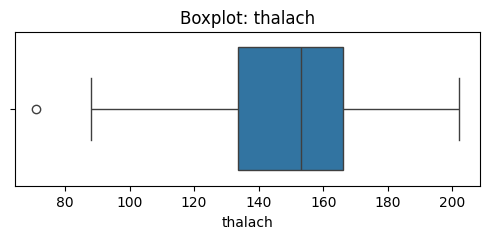

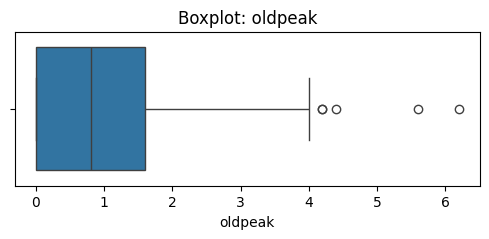

In [31]:
# Load data
import pandas as pd
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
    names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
           "exang", "oldpeak", "slope", "ca", "thal", "target"]
)

# Cek nilai hilang ("?" dianggap missing)
df.replace("?", pd.NA, inplace=True)
missing = df.isna().sum()
print("Jumlah missing value per kolom:")
print(missing)

# Konversi kolom numerik yang ada missing-nya
df["ca"] = pd.to_numeric(df["ca"], errors='coerce')
df["thal"] = pd.to_numeric(df["thal"], errors='coerce')

# Cek outlier dengan boxplot
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

### c. Visualisasi

* **Histogram/boxplot** distribusi tiap fitur numerik untuk deteksi outlier & skewness.
* **Bar chart** untuk kategori (`cp`, `thal`, `exang`).
* **Correlation heatmap** antara fitur-fitur numerik, dan antara fitur dan target.
* **Pairplot atau scatter** untuk hubungan antara variabel dan label.
* **Countplot** pembagian label (`num` binari).

Setelah data dibersihkan dari nilai-nilai kosong dengan menggunakan fungsi `dropna()`, semua baris yang memiliki setidaknya satu nilai `NaN` dihapus dari dataset. Langkah ini memastikan bahwa seluruh data yang akan diproses pada tahap selanjutnya adalah lengkap dan tidak mengandung informasi yang hilang.

Kolom `target` yang awalnya mengandung nilai numerik dari 0 hingga 4 kemudian dikonversi menjadi biner. Hal ini dilakukan karena dalam konteks analisis ini, fokusnya adalah membedakan antara pasien yang memiliki indikasi penyakit jantung dan yang tidak. Nilai `0` menandakan tidak ada penyakit, sementara nilai `1` mewakili adanya kondisi jantung (yang semula ditandai oleh nilai 1 hingga 4). Dengan demikian, klasifikasi dikembalikan ke bentuk dua kelas (binary classification), yaitu `0` dan `1`.

Setelah data bersih dan target telah diklasifikasikan ulang, dilakukan analisis korelasi antar fitur. Visualisasi ini menggunakan heatmap yang menampilkan nilai korelasi Pearson antara setiap pasangan fitur numerik. Warna dalam heatmap menunjukkan seberapa kuat hubungan antar fitur, dengan nilai mendekati 1 atau -1 menunjukkan hubungan yang kuat (positif atau negatif), dan nilai mendekati 0 menunjukkan tidak ada korelasi yang signifikan. Heatmap ini berguna untuk mengidentifikasi fitur yang saling berkaitan atau redundant, serta melihat fitur mana yang paling berhubungan dengan target.

Terakhir, distribusi kelas target ditampilkan menggunakan countplot. Grafik ini menunjukkan jumlah data pada masing-masing kelas, yaitu jumlah pasien yang tidak memiliki penyakit jantung (`0`) dan yang memiliki (`1`). Visualisasi ini membantu untuk mengetahui apakah data target seimbang atau tidak. Jika distribusi sangat timpang, hal ini bisa menjadi pertimbangan untuk penyesuaian model atau teknik sampling selanjutnya.



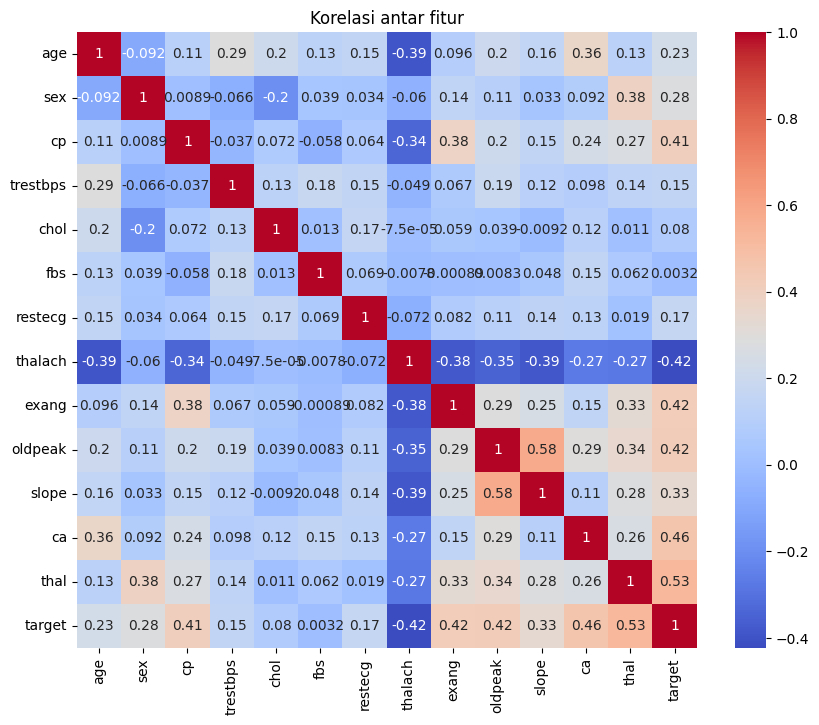

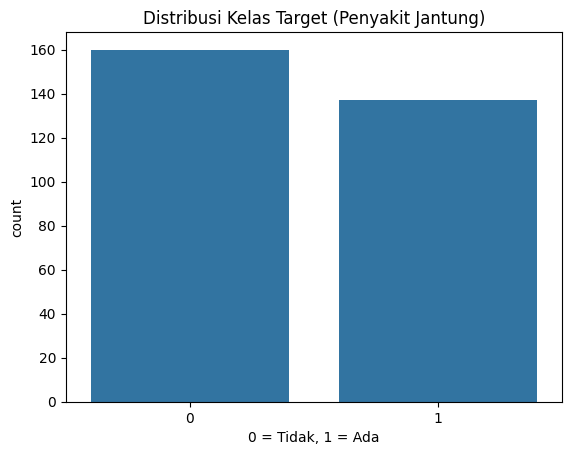

In [32]:
# Hapus data yang masih ada nilai kosong
df.dropna(inplace=True)

# Ubah target menjadi biner: 0 (tidak sakit), 1 (sakit)
df["target"] = df["target"].astype(int)
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi antar fitur")
plt.show()

# Distribusi target
sns.countplot(x="target", data=df)
plt.title("Distribusi Kelas Target (Penyakit Jantung)")
plt.xlabel("0 = Tidak, 1 = Ada")
plt.show()



## 3. Data Preprocessing

Langkah yang general digunakan:

1. **Handling missing**

   * Jika missing relatif sedikit (misal <5%), perform imputasi (mean/median) atau hapus baris.

2. **Encoding fitur kategorikal**

   * `cp`, `restecg`, `slope`, `thal`, `sex`, `fbs`, `exang`: menggunakan one-hot (untuk dt bisa jugak label encoding).

3. **Normalisasi / scaling**

   * Untuk decision tree umumnya tidak diperlukan, tapi bisa diuji.

4. **Feature engineering** (opsional)

   * Contoh: pembuatan bin seperti `age_group`, rasio faktor risiko, polinomial.

5. **Feature selection / reduksi dimensi (opsional)**

   * Bisa gunakan PCA atau seleksi berbasis feature importance decision tree.




Dataset *Heart Disease* dimuat dari sumber UCI dengan memberikan nama-nama kolom secara manual. Setelah data dimuat, nilai "?" yang menandakan data hilang diganti dengan `np.nan`, agar dapat dikenali sebagai nilai kosong oleh pustaka `pandas`. Dua kolom yang mengandung data bertipe non-numerik karena nilai "?" (`ca` dan `thal`) kemudian dikonversi menjadi tipe data numerik menggunakan fungsi `pd.to_numeric` dengan parameter `errors='coerce'`, yang secara otomatis mengubah data yang tidak dapat dikonversi menjadi `NaN`.

Setelah nilai hilang dikenali, dilakukan pencetakan jumlah nilai kosong per kolom untuk melihat sebarannya. Baris-baris yang mengandung `NaN` dihapus dari dataset menggunakan `dropna()`, untuk memastikan bahwa seluruh data yang tersisa lengkap dan siap untuk diproses lebih lanjut. Jumlah total data setelah pembersihan dicetak untuk diketahui.

Langkah selanjutnya adalah menyederhanakan label target menjadi dua kelas. Nilai pada kolom `target`, yang awalnya memiliki nilai 0–4, dikonversi menjadi `int` dan diubah menjadi biner dengan aturan: nilai 0 tetap sebagai 0 (menandakan tidak sakit), sementara nilai di atas 0 diubah menjadi 1 (menandakan indikasi penyakit jantung).

Setelah itu, dilakukan proses one-hot encoding terhadap kolom-kolom kategorikal, yaitu `cp`, `restecg`, `slope`, dan `thal`. One-hot encoding dilakukan untuk mengubah data kategorikal menjadi format numerik biner, agar dapat digunakan dalam proses pelatihan model. Parameter `drop_first=True` digunakan agar salah satu kategori dihapus sebagai referensi untuk menghindari multikolinearitas.

Dataset kemudian dipisahkan menjadi fitur (X) dan target (y). Proses split data dilakukan dengan `train_test_split`, di mana 70% data digunakan untuk pelatihan (training), dan 30% sisanya digunakan untuk pengujian (testing). Parameter `stratify=y` memastikan distribusi label target tetap seimbang di kedua subset data.

Setelah pembagian data dilakukan, dicetak informasi penting terkait dataset: jumlah fitur yang digunakan, jumlah total data, serta jumlah data pelatihan dan pengujian. Selain itu, distribusi kelas target ditampilkan dalam bentuk proporsi untuk masing-masing subset (train dan test), guna memastikan tidak terjadi ketimpangan data. Terakhir, lima baris pertama dari data fitur pelatihan (`X_train`) ditampilkan sebagai contoh.







In [33]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load Data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
           "exang", "oldpeak", "slope", "ca", "thal", "target"]

df = pd.read_csv(url, names=columns)

# Tangani missing value (nilai "?")
df.replace("?", np.nan, inplace=True)
df["ca"] = pd.to_numeric(df["ca"], errors="coerce")
df["thal"] = pd.to_numeric(df["thal"], errors="coerce")

# Cek jumlah nilai kosong
print(" Missing value per kolom:\n", df.isnull().sum())

# Drop baris dengan missing value
df.dropna(inplace=True)
print(f"\n Jumlah data setelah drop missing value: {len(df)} baris")

# Konversi label target menjadi biner
df["target"] = df["target"].astype(int)
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

# One-hot encoding untuk kolom kategorikal
df_encoded = pd.get_dummies(df, columns=["cp", "restecg", "slope", "thal"], drop_first=True)

# Pisahkan fitur dan label
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

#  Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#  Tampilkan informasi hasil split
print("\n Informasi dataset:")
print(f"- Jumlah fitur       : {X.shape[1]}")
print(f"- Total data         : {len(df)}")
print(f"- Data latih (train) : {X_train.shape[0]}")
print(f"- Data uji   (test)  : {X_test.shape[0]}")

#  Cek proporsi kelas
print("\n Distribusi label (target):")
print("Train set:")
print(y_train.value_counts(normalize=True).rename({0: "Tidak sakit", 1: "Sakit"}))
print("Test set:")
print(y_test.value_counts(normalize=True).rename({0: "Tidak sakit", 1: "Sakit"}))

# Tampilkan 5 baris pertama dari X_train
print("\n Contoh data X_train:")
print(X_train.head())

 Missing value per kolom:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

 Jumlah data setelah drop missing value: 297 baris

 Informasi dataset:
- Jumlah fitur       : 18
- Total data         : 297
- Data latih (train) : 207
- Data uji   (test)  : 90

 Distribusi label (target):
Train set:
target
Tidak sakit    0.541063
Sakit          0.458937
Name: proportion, dtype: float64
Test set:
target
Tidak sakit    0.533333
Sakit          0.466667
Name: proportion, dtype: float64

 Contoh data X_train:
      age  sex  trestbps   chol  fbs  thalach  exang  oldpeak   ca  cp_2.0  \
115  41.0  1.0     135.0  203.0  0.0    132.0    0.0      0.0  0.0    True   
94   63.0  0.0     135.0  252.0  0.0    172.0    0.0      0.0  0.0   False   
186  42.0  1.0     120.0  240.0  1.0    194.0    0.0      0.8  0.0   False   
68   59.0  1.0     170.0


## 4. Model: Decision Tree, Random Forest, Naive Bayes Classification

* Ubah num menjadi biner: 0 (no disease) vs ≥1 (disease).
* Bagi data train/test (misal 70/30) dengan stratifikasi label.
* Bangun model decision tree (scikit‑learn DecisionTreeClassifier) dengan parameter: max\_depth, min\_samples\_leaf, dan criterion (gini/entropy).
* Gunakan cross-validation untuk tuning hyperparameter (GridSearchCV).
* Visualisasikan pohon untuk interpretasi fitur penting.





=== Decision Tree (Tuned) ===
Parameter terbaik: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}
Confusion Matrix:
 [[39  9]
 [12 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        48
           1       0.77      0.71      0.74        42

    accuracy                           0.77        90
   macro avg       0.77      0.76      0.76        90
weighted avg       0.77      0.77      0.77        90

Accuracy: 0.7666666666666667
ROC-AUC: 0.8653273809523809


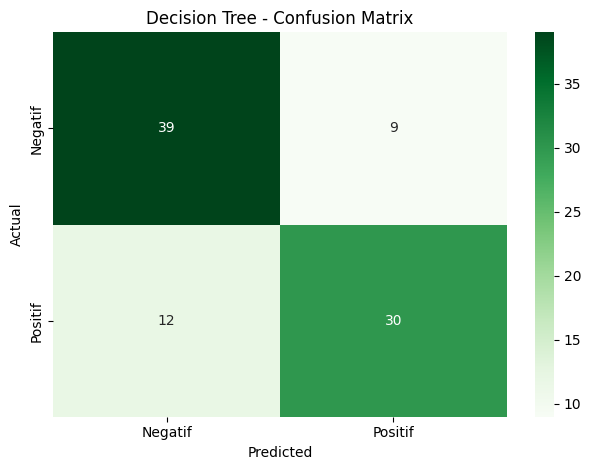

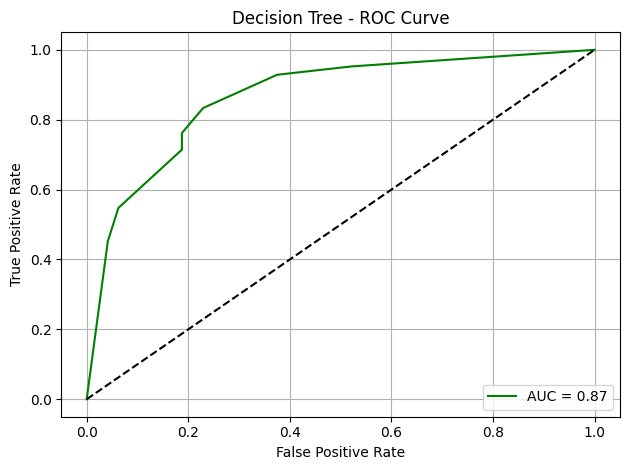

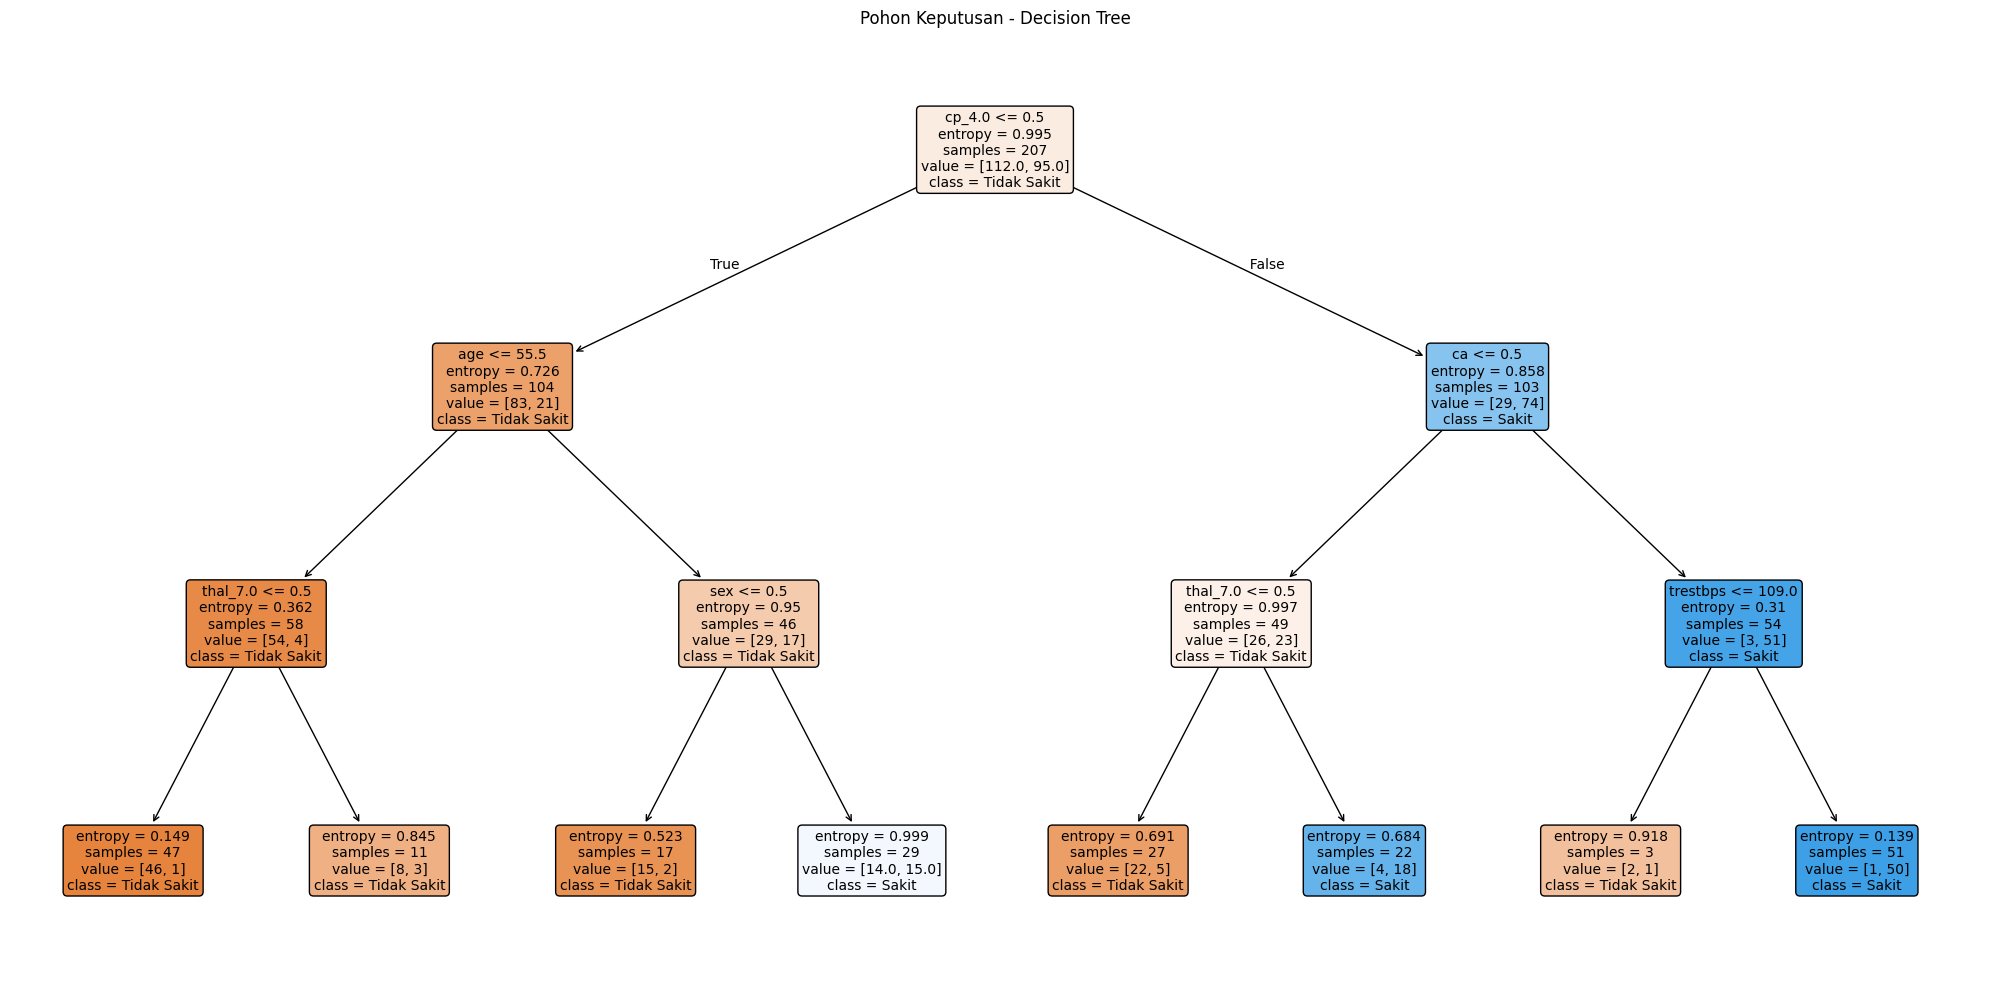


=== Random Forest ===
Confusion Matrix:
 [[43  5]
 [14 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        48
           1       0.85      0.67      0.75        42

    accuracy                           0.79        90
   macro avg       0.80      0.78      0.78        90
weighted avg       0.80      0.79      0.79        90

Accuracy: 0.7888888888888889
ROC-AUC: 0.9151785714285714


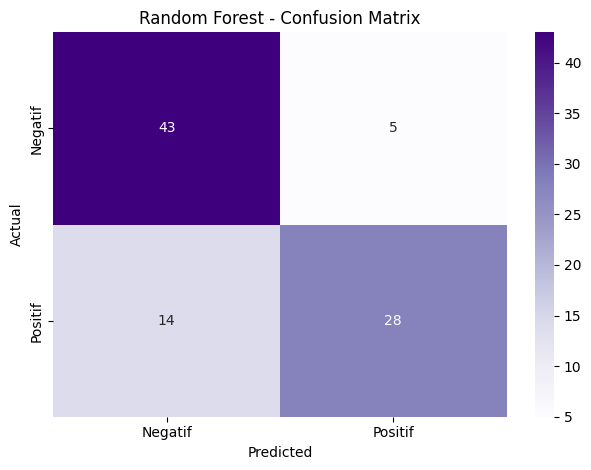

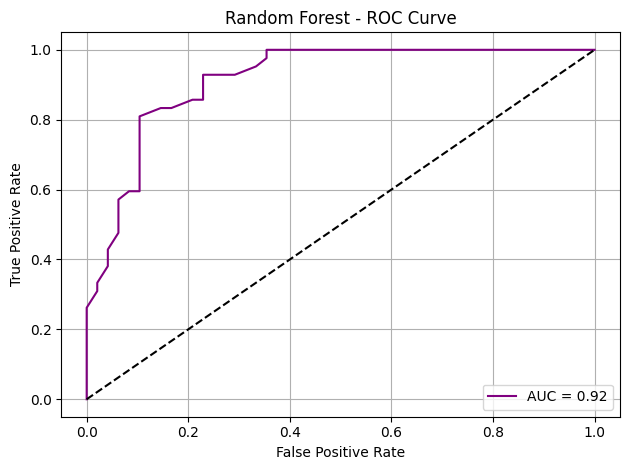


=== Naive Bayes ===
Confusion Matrix:
 [[41  7]
 [10 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        48
           1       0.82      0.76      0.79        42

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90

Accuracy: 0.8111111111111111
ROC-AUC: 0.9057539682539683


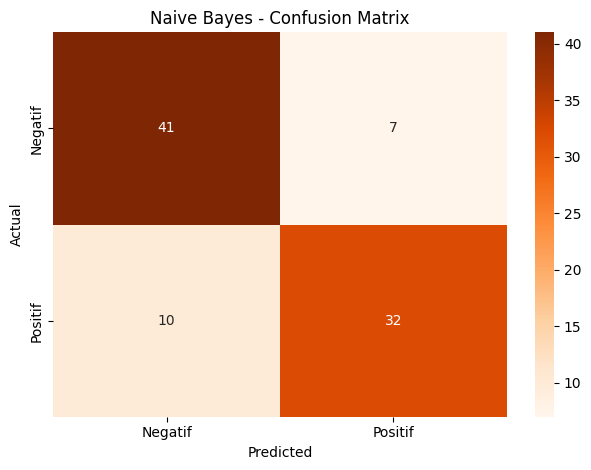

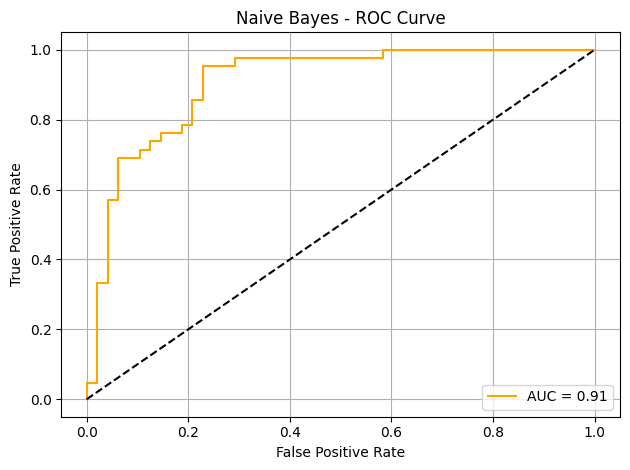

In [34]:
# === IMPORT LIBRARY ===
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_auc_score,
    roc_curve
)

# === DECISION TREE (TUNED) ===
param_grid = {
    "max_depth": [3, 5, 7, None],
    "min_samples_leaf": [1, 5, 10],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="f1"
)
grid.fit(X_train, y_train)

model_dt = grid.best_estimator_
y_pred_dt = model_dt.predict(X_test)
y_proba_dt = model_dt.predict_proba(X_test)[:, 1]

print("=== Decision Tree (Tuned) ===")
print("Parameter terbaik:", grid.best_params_)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm_dt)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
acc_dt = accuracy_score(y_test, y_pred_dt)
roc_dt = roc_auc_score(y_test, y_proba_dt)
print("Accuracy:", acc_dt)
print("ROC-AUC:", roc_dt)

# CM Heatmap
plt.figure()
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Negatif", "Positif"],
            yticklabels=["Negatif", "Positif"])
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f"AUC = {roc_dt:.2f}", color="green")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Tree Visual
plt.figure(figsize=(20, 10))
plot_tree(model_dt,
          feature_names=X_train.columns,  # Jika bukan DataFrame, ganti manual
          class_names=["Tidak Sakit", "Sakit"],
          filled=True, rounded=True, fontsize=10)
plt.title("Pohon Keputusan - Decision Tree")
plt.tight_layout()
plt.show()

# === RANDOM FOREST ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("\n=== Random Forest ===")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_proba_rf)
print("Accuracy:", acc_rf)
print("ROC-AUC:", roc_rf)

plt.figure()
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Negatif", "Positif"],
            yticklabels=["Negatif", "Positif"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {roc_rf:.2f}", color="purple")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Random Forest - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === NAIVE BAYES ===
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_proba_nb = nb.predict_proba(X_test)[:, 1]

print("\n=== Naive Bayes ===")
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n", cm_nb)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))
acc_nb = accuracy_score(y_test, y_pred_nb)
roc_nb = roc_auc_score(y_test, y_proba_nb)
print("Accuracy:", acc_nb)
print("ROC-AUC:", roc_nb)

plt.figure()
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Negatif", "Positif"],
            yticklabels=["Negatif", "Positif"])
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
plt.figure()
plt.plot(fpr_nb, tpr_nb, label=f"AUC = {roc_nb:.2f}", color="orange")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Naive Bayes - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

## 5.	Evaluasi Model

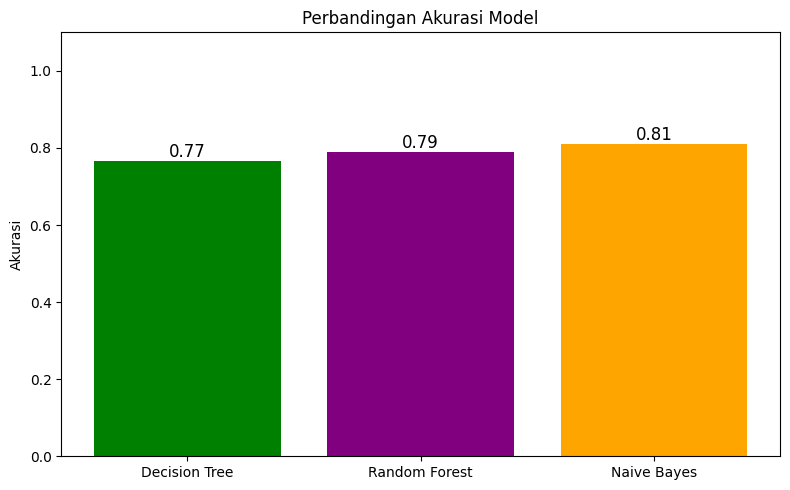

In [35]:
# === GRAFIK PERBANDINGAN AKURASI ===
import numpy as np

# Nama model dan akurasinya
model_names = ['Decision Tree', 'Random Forest', 'Naive Bayes']
accuracies = [acc_dt, acc_rf, acc_nb]

# Buat bar chart
plt.figure(figsize=(8, 5))
colors = ['green', 'purple', 'orange']
plt.bar(model_names, accuracies, color=colors)

# Tambahkan label angka akurasi di atas batang
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)

plt.title("Perbandingan Akurasi Model")
plt.ylim(0, 1.1)
plt.ylabel("Akurasi")
plt.tight_layout()
plt.show()

| Model             | Accuracy  | Precision (avg) | Recall (avg) | F1-score (avg) | ROC-AUC |
| ----------------- | --------- | --------------- | ------------ | -------------- | ------- |
| **Decision Tree** | 0.767     | 0.77            | 0.76         | 0.76           | 0.865   |
| **Random Forest** | 0.789     | 0.80            | 0.78         | 0.78           | 0.915   |
| **Naive Bayes**   | **0.811** | **0.81**        | **0.81**     | **0.81**       | 0.906   |



###  **Kesimpulan Perbandingan Model:

1. **Naive Bayes** menunjukkan performa **terbaik secara keseluruhan**:

   * Akurasi tertinggi (**81.1%**)
   * Precision, recall, dan f1-score *macro average* juga tertinggi (**0.81**)
   * Hasil ini menunjukkan Naive Bayes mampu memprediksi kedua kelas (sakit & tidak sakit) secara seimbang.

2. **Random Forest** memiliki **ROC-AUC tertinggi** (**91.5%**)

   * Artinya, Random Forest sangat baik dalam **membedakan antara kelas positif dan negatif**.
   * Meskipun akurasinya sedikit lebih rendah dari Naive Bayes, model ini cenderung **lebih kuat** dalam kasus **imbalance** atau **noise**.

3. **Decision Tree (tuned)** memiliki performa paling rendah:

   * Akurasi hanya **76.7%**
   * F1-score dan ROC-AUC juga lebih rendah dibandingkan dua model lainnya.
   * Namun, model ini **paling mudah dijelaskan dan divisualisasikan** (interpretable).